Stellar evolution on various time scales
====================


In [1]:
%matplotlib inline
import numpy
from matplotlib import pyplot
from amuse.units import units
from amuse.datamodel import Particle

In [46]:
from amuse.community.seba.interface import SeBa
def run_SeBa(mass, t_end, dt):
    stars = Particle(mass=mass)
    stellar = SeBa()
    stellar.particles.add_particles(stars.as_set())
    channels = {"to_stars": stellar.particles.new_channel_to(stars.as_set()), 
                "to_stellar": stars.as_set().new_channel_to(stellar.particles)}
    masses = [] | units.MSun
    times = [] | units.Myr
    dm_dt = [] | units.MSun/units.yr
    lums = [] | units.LSun
    stellar_types = []
    rads = [] | units.RSun
    
    dt_diag = 0.001 | units.Myr
    t_diag = dt_diag
    time = 0 | units.Myr
    while time<t_end:
        time += dt
        stellar.evolve_model(time)
        if time>t_diag:
            t_diag += dt_diag
            channels["to_stars"].copy()
            masses.append(stars.mass)
            times.append(time)
            dm_dt.append((mass-stars.mass)/dt)
            lums.append(stars.luminosity)
            stellar_types.append(stars.stellar_type)
            rads.append(stars.radius)
            mass = stars.mass
    stellar.stop()
    return times, masses, dm_dt, lums, stellar_types, rads

IncompatibleUnitsException: Cannot express LSun in MSun, the units do not have the same bases

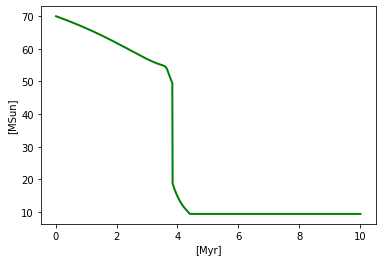

In [48]:
from amuse.plot import plot
m_init = 70.0 | units.MSun
t_end = 10.0 | units.Myr
times, mass, dm_dt, lums, stellar_types, rads = run_SeBa(m_init, t_end, 0.01|units.Myr)
plot(times, mass, lw=2, c='g')
#times, mass = run_SeBa(m_init, t_end, 0.00001|units.Myr)
#plot(times, mass, lw=1, c='r')
pyplot.ylabel("mass [MSun]")
pyplot.xlabel("time [Myr]")
pyplot.show()
plot(times,dm_dt)
pyplot.show()

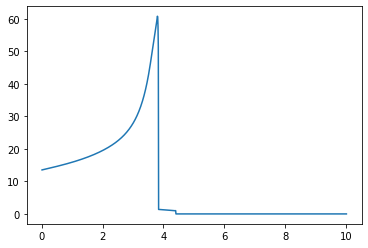

In [58]:
#print(stellar_types[0].value())
pyplot.plot(times.value_in(units.Myr), rads.value_in(units.RSun))
#pyplot.semilogy(times.value_in(units.Myr), wind_delt_m.value_in(units.MSun/units.yr), 'r')
#pyplot.ylim(1e-8,1e-2)
pyplot.show()

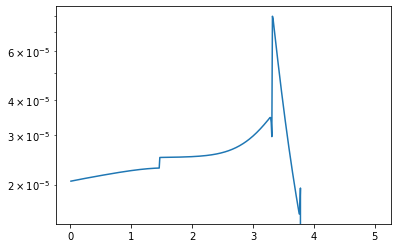

In [5]:
#print(delt_m)
pyplot.semilogy(times.value_in(units.Myr), -1*wind_delt_m.value_in(units.MSun/units.yr))
#pyplot.ylim(-0.1, 0.5)
pyplot.show()

In [6]:
import csv

with open("SeBa_andris_dmdt.csv","w") as f:
    writer = csv.writer(f,delimiter='\t')
    writer.writerows(zip(times.value_in(units.Myr),
                         -1*wind_delt_m.value_in(units.MSun/units.yr),
                        mass.value_in(units.MSun)))

f.close()

In [35]:
import csv

def Read_Three_Column_File(file_name):
    with open(file_name, 'r') as f_input:
        csv_input = csv.reader(f_input, delimiter='\t')#, skipinitialspace=True)
        x = []
        y = []
        z = []
        for cols in csv_input:
            x.append(float(cols[0]))
            y.append(float(cols[1]))
            z.append(float(cols[2]))

    return x, y, z

time_andris, dm_dt_andris, mass_andris = Read_Three_Column_File('./Seba-tests-Cart/SeBa_andris_dmdt.csv')
time_torch, dm_dt_torch, mass_torch = Read_Three_Column_File('./Seba-tests-Cart/SeBa_torch_dmdt.csv')


/Users/sean/anaconda2/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/sean/anaconda2/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


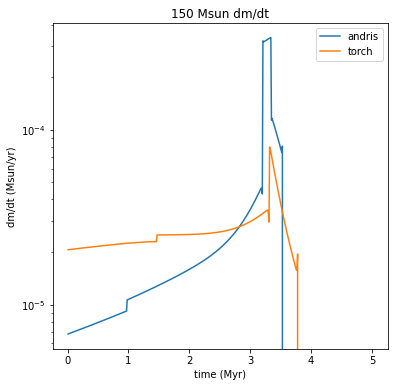

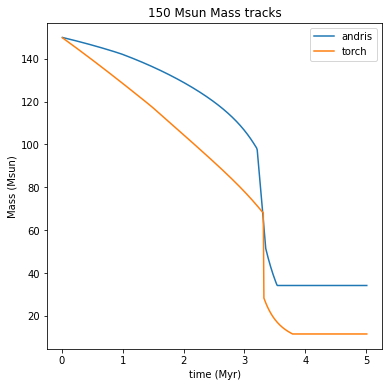

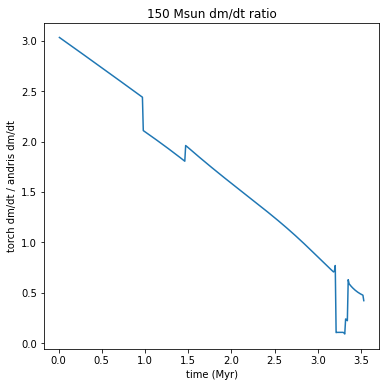

In [45]:
def plt_seba_info(time1, time2, dm_dt1, dm_dt2, mass1, mass2, star_mass):
    dm_dt_ratio = numpy.array(dm_dt2) / numpy.array(dm_dt1)
    mass_ratio = numpy.array(mass1) / numpy.array(mass2)
    pyplot.figure(figsize=(6,6))
    pyplot.semilogy(time1, dm_dt1,label='andris')
    pyplot.semilogy(time2, dm_dt2, label='torch')
    pyplot.legend()
    pyplot.title(str(star_mass) + " Msun dm/dt")
    pyplot.xlabel("time (Myr)")
    pyplot.ylabel("dm/dt (Msun/yr)")
    pyplot.show()

    pyplot.figure(figsize=(6,6))
    pyplot.plot(time1, mass1, label='andris')
    pyplot.plot(time2, mass2, label='torch')
    pyplot.legend()
    pyplot.title(str(star_mass) + " Msun Mass tracks")
    pyplot.xlabel("time (Myr)")
    pyplot.ylabel("Mass (Msun)")
    pyplot.show()

    pyplot.figure(figsize=(6,6))
    pyplot.plot(time1, dm_dt_ratio)
    pyplot.title(str(star_mass) + " Msun dm/dt ratio")
    pyplot.xlabel("time (Myr)")
    pyplot.ylabel("torch dm/dt / andris dm/dt")
    pyplot.show()
    return

time_andris, dm_dt_andris, mass_andris = Read_Three_Column_File('./Seba-tests-Cart/SeBa_andris_150Msun_dmdt.csv')
time_torch, dm_dt_torch, mass_torch = Read_Three_Column_File('./Seba-tests-Cart/SeBa_torch_150Msun_dmdt.csv')
plt_seba_info(time_andris, time_torch, dm_dt_andris, dm_dt_torch, mass_andris, mass_torch, 150)
#pyplot.figure(figsize=(6,6))
#pyplot.plot(time_torch, mass_ratio)
#pyplot.title("150 Msun Mass ratio")
#pyplot.xlabel("time (Myr)")
#pyplot.ylabel("torch Mass / andris Mass")
#pyplot.show()
#print(numpy.array(mass_torch) - numpy.array(mass_andris))

/Users/sean/anaconda2/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/sean/anaconda2/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


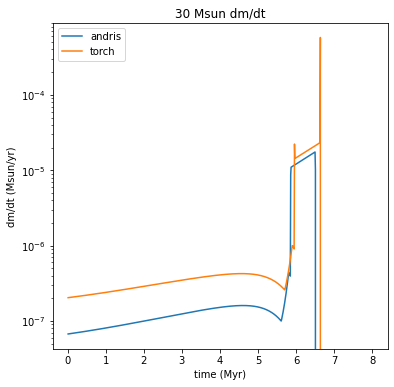

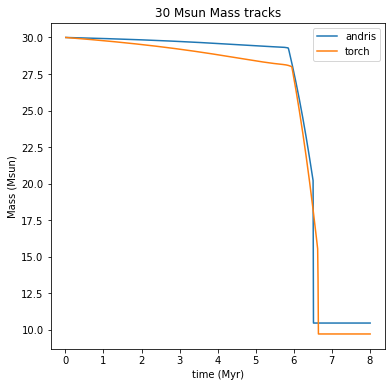

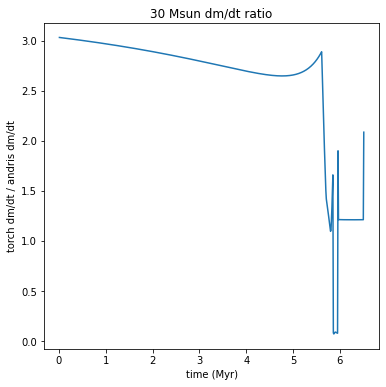

In [41]:
time_andris, dm_dt_andris, mass_andris = Read_Three_Column_File('./Seba-tests-Cart/SeBa_andris_30Msun_dmdt.csv')
time_torch, dm_dt_torch, mass_torch = Read_Three_Column_File('./Seba-tests-Cart/SeBa_torch_30Msun_dmdt.csv')
plt_seba_info(time_andris, time_torch, dm_dt_andris, dm_dt_torch, mass_andris, mass_torch, 30)

/Users/sean/anaconda2/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/sean/anaconda2/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


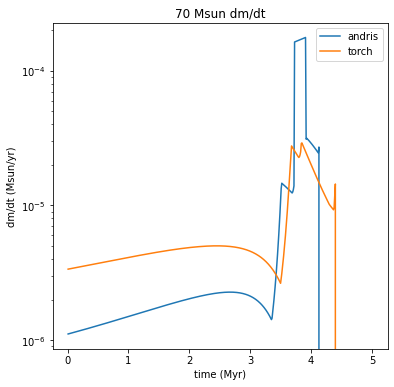

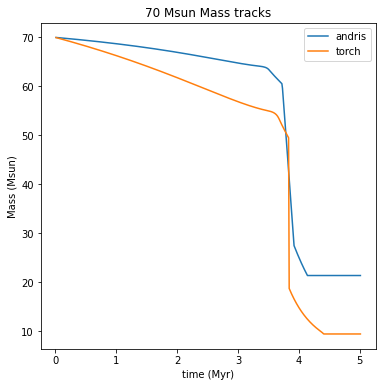

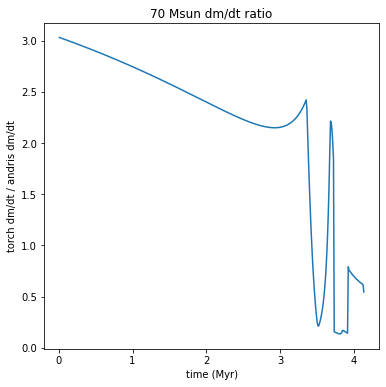

In [43]:
time_andris, dm_dt_andris, mass_andris = Read_Three_Column_File('./Seba-tests-Cart/SeBa_andris_70Msun_dmdt.csv')
time_torch, dm_dt_torch, mass_torch = Read_Three_Column_File('./Seba-tests-Cart/SeBa_torch_70Msun_dmdt.csv')
plt_seba_info(time_andris, time_torch, dm_dt_andris, dm_dt_torch, mass_andris, mass_torch, 70)

In [67]:
import csv

def Read_Six_Column_File(file_name):
    with open(file_name, 'r') as f_input:
        csv_input = csv.reader(f_input, delimiter='\t')#, skipinitialspace=True)
        a = []
        b = []
        c = []
        x = []
        y = []
        z = []
        for cols in csv_input:
            a.append(float(cols[0]))
            b.append(float(cols[1]))
            c.append(float(cols[2]))
            x.append(float(cols[3]))
            y.append(cols[4])
            z.append(float(cols[5]))

    return a, b, c, x, y, z

time_andris, dm_dt_andris, mass_andris, lum_andris, stellar_type_andris, rad_andris = Read_Six_Column_File('./Seba-tests-Cart/SeBa_andris_70Msun_data.csv')
time_andris, dm_dt_andris, mass_torch, lum_torch, stellar_type_torch, rad_torch = Read_Six_Column_File('./Seba-tests-Cart/SeBa_torch_70Msun_data.csv')

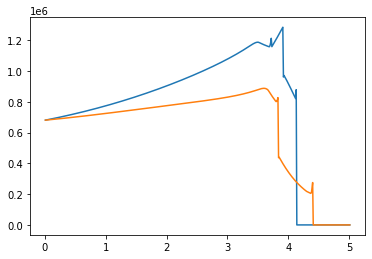

In [70]:
pyplot.plot(time_andris, lum_andris)
pyplot.plot(time_andris, lum_torch)
pyplot.show()